In [1]:
import os
os.chdir('/mnt/jw01-aruk-home01/projects/psa_functional_genomics/RA_challenge/RA2_alpine_lads')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
import os
import tensorflow as tf
import tensorflow_addons as tfa
from utils.config import Config
import dataset.train_dataset as dtd
import PIL
import PIL.ImageOps
from tensorflow.keras.utils import plot_model
test_config = Config()
from tensorflow.keras.models import load_model


In [40]:
model = model.load_weights("weights/model_0.hd5/variables/variables")

In [30]:
NASnet_model = keras.applications.NASNetMobile(input_shape=[test_config.img_height,test_config.img_width,1], include_top=False,weights=None,)

In [31]:
inputs = keras.layers.Input(shape=[test_config.img_height,test_config.img_width,1])

common_part = NASnet_model(inputs)
common_part =  tf.keras.layers.GlobalAveragePooling2D()(common_part)




In [32]:
disease_gender = keras.layers.Dense(16, activation='sigmoid', name='disease_gend_pred')(common_part)


In [33]:
age = keras.layers.Dense(1,activation="linear",name="age_pred")(common_part)

In [34]:
model = keras.models.Model(
    inputs=inputs,
    outputs=[disease_gender, age],
    name="NASnet_multiout")

In [42]:
model.summary()

AttributeError: 'CheckpointLoadStatus' object has no attribute 'summary'

In [5]:
losses = {
    "disease_gend_pred": "binary_crossentropy",
    "age_pred": "mean_squared_error",
}
lossWeights = {"disease_gend_pred": 1.0, "age_pred": 0.001}



In [10]:
model.compile(optimizer='adam', loss=losses, loss_weights=lossWeights, metrics=["binary_accuracy","mae"])

In [11]:
import dataset.pretrain_dataset as dpd


In [12]:
import importlib
importlib.reload(dpd)

<module 'dataset.pretrain_dataset' from '/mnt/jw01-aruk-home01/projects/psa_functional_genomics/RA_challenge/RA2_alpine_lads/dataset/pretrain_dataset.py'>

In [13]:
dataset = dpd.pretrain_dataset_NIH_chest(test_config)
chest_dataset, chest_dataset_val = dataset.initialize_pipeline()

In [14]:
def split_dataset_outputs(x,y):
    return x,(tf.split(y,[1,16],1)[1],tf.split(y,[1,16],1)[0])
chest_dataset3 = chest_dataset.map(split_dataset_outputs)
chest_dataset_val3 = chest_dataset_val.map(split_dataset_outputs)

In [15]:
H = model.fit(chest_dataset3, validation_data=chest_dataset_val3,
    epochs=2,steps_per_epoch=100,validation_steps=5)

Train for 100 steps, validate for 5 steps
Epoch 1/2
100/100 [==============================] - 152s 2s/step - loss: 0.8500 - disease_gend_pred_loss: 0.2553 - age_pred_loss: 594.6498 - disease_gend_pred_binary_accuracy: 0.8987 - disease_gend_pred_mae: 0.1383 - age_pred_binary_accuracy: 0.0000e+00 - age_pred_mae: 19.1574


AlreadyExistsError: 2 root error(s) found.
  (0) Already exists:  There appears to be a concurrent caching iterator running - cache lockfile already exists ('/mnt/iusers01/jw01/mdefscs4/localscratch/RA_challenge_scratchchest_val_0.lockfile'). If you are sure no other running TF computations are using this cache prefix, delete the lockfile and re-initialize the iterator. Lockfile contents: Created at: 1579985830
	 [[node IteratorGetNext (defined at /mnt/jw01-aruk-home01/projects/functional_genomics/bin/tensorflow_gpu/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]]
	 [[Shape/_8]]
  (1) Already exists:  There appears to be a concurrent caching iterator running - cache lockfile already exists ('/mnt/iusers01/jw01/mdefscs4/localscratch/RA_challenge_scratchchest_val_0.lockfile'). If you are sure no other running TF computations are using this cache prefix, delete the lockfile and re-initialize the iterator. Lockfile contents: Created at: 1579985830
	 [[node IteratorGetNext (defined at /mnt/jw01-aruk-home01/projects/functional_genomics/bin/tensorflow_gpu/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]]
0 successful operations.
0 derived errors ignored. [Op:__inference_distributed_function_90893]

Function call stack:
distributed_function -> distributed_function


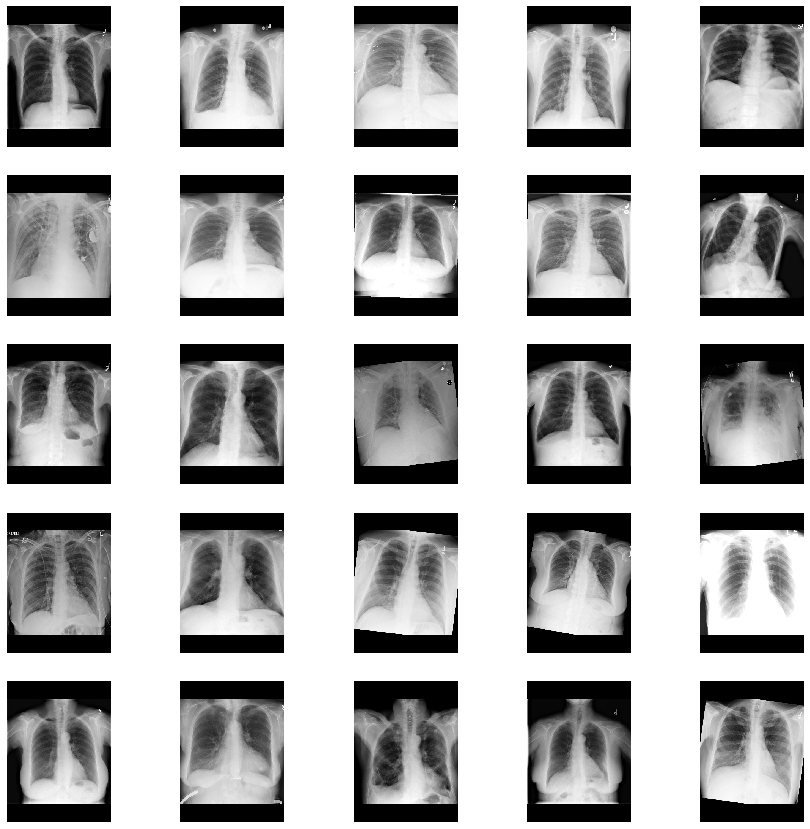

In [7]:
for a,b in chest_dataset3.take(1):
    plt.figure(figsize=(15,15))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.array(a[n])[:, :, 0],cmap="gray")
        plt.axis('off')

In [22]:
H

NameError: name 'H' is not defined

In [38]:
def split_dataset_outputs(x,y):
    return x
def split_dataset_outputs2(x,y):
    return tf.split(y,[1,16],1)[1],tf.split(y,[1,16],1)[0]
chest_dataset1 = chest_dataset.map(split_dataset_outputs)
chest_dataset2 = chest_dataset.map(split_dataset_outputs2)
chest_dataset3 = tf.data.Dataset.zip((chest_dataset1, chest_dataset2)) 

chest_dataset_val1 = chest_dataset_val.map(split_dataset_outputs)
chest_dataset_val2 = chest_dataset_val.map(split_dataset_outputs2)
chest_dataset_val3 = tf.data.Dataset.zip((chest_dataset_val1, chest_dataset_val2)) 